Notebook for Isomap non-linear dimensionality reduction

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
import imageio
import glob
import math

In [2]:
# Faces
emotionFolders = glob.glob('images/train/*')
emotionFolders = [x + '/*.jpg' for x in emotionFolders]
emotions = [x.split('/')[-1] for x in emotionFolders]
print("Emotions: ", emotions)
path = 'images/train/'
print(emotionFolders)

Emotions:  ['*.jpg', '*.jpg', '*.jpg', '*.jpg', '*.jpg', '*.jpg', '*.jpg']
['images/train/Happy/*.jpg', 'images/train/Sad/*.jpg', 'images/train/Fear/*.jpg', 'images/train/Surprise/*.jpg', 'images/train/Neutral/*.jpg', 'images/train/Angry/*.jpg', 'images/train/Disgust/*.jpg']


In [4]:
# importing data

num_images_per_emotion = 30
samples = []

for folder in emotionFolders:
    print(folder)
    imageNum = 0
    for filename in glob.glob(folder):
        imageNum += 1
        img = imageio.imread(filename)
        samples.append(img.reshape(-1))
        if imageNum == num_images_per_emotion:
            break

images/train/Happy/*.jpg
images/train/Sad/*.jpg
images/train/Fear/*.jpg
images/train/Surprise/*.jpg
images/train/Neutral/*.jpg
images/train/Angry/*.jpg
images/train/Disgust/*.jpg


/var/folders/4q/h6mrxg6x5tn0mwqnw8_b8jtr0000gn/T/ipykernel_49874/3295314576.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(filename)


In [5]:
df = pd.DataFrame.from_records(samples, coerce_float=True)
num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

In [6]:
iso = manifold.Isomap(n_neighbors=5, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['component1', 'component2'])
manifold_2D.head()

,component1,component2
0,-4295.360653,85.955153
1,-7769.601213,-2814.552014
2,-4261.396284,4265.682288
3,-353.819129,4610.699620
4,-1091.702905,571.450663


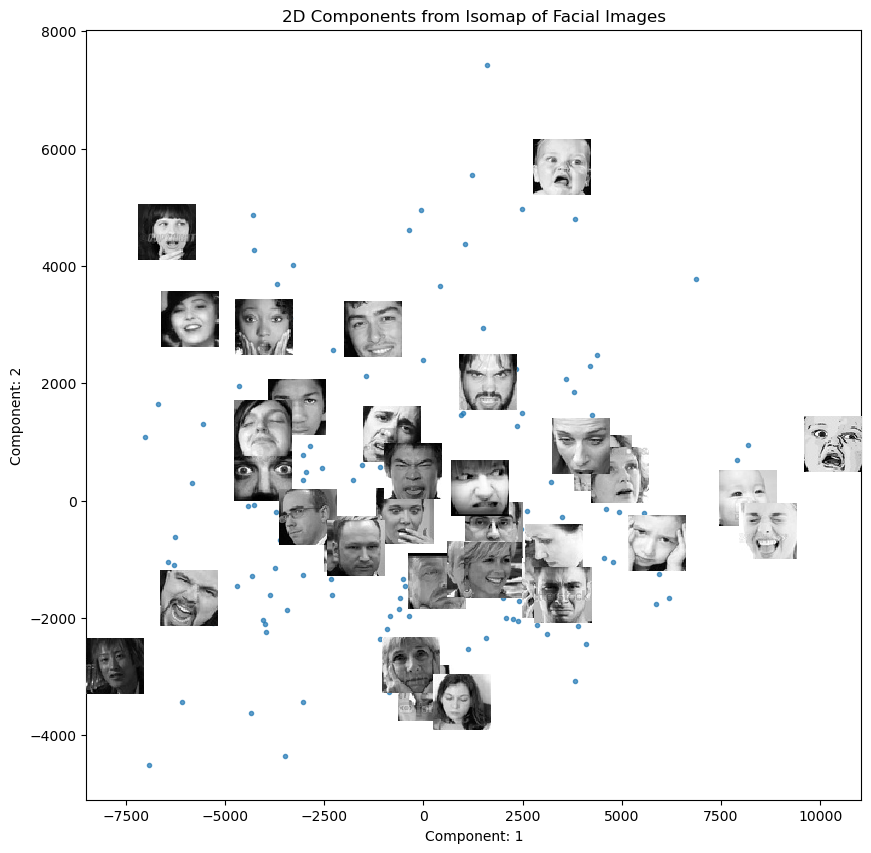

In [7]:
%matplotlib inline
np.random.seed(42)
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['component1']) - min(manifold_2D['component1'])) * 0.08
y_size = (max(manifold_2D['component2']) - min(manifold_2D['component2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'component1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'component2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'component1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'component2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['component1'], manifold_2D['component2'], marker='.',alpha=0.7)
plt.show()

In [24]:
num_images

700